In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df_CDB = pd.read_csv(r'../../results/calibration-grid-search-oct2021-sep2022-cdb-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
df_HEB = pd.read_csv(r'../../results/calibration-grid-search-oct2021-sep2022-heb-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

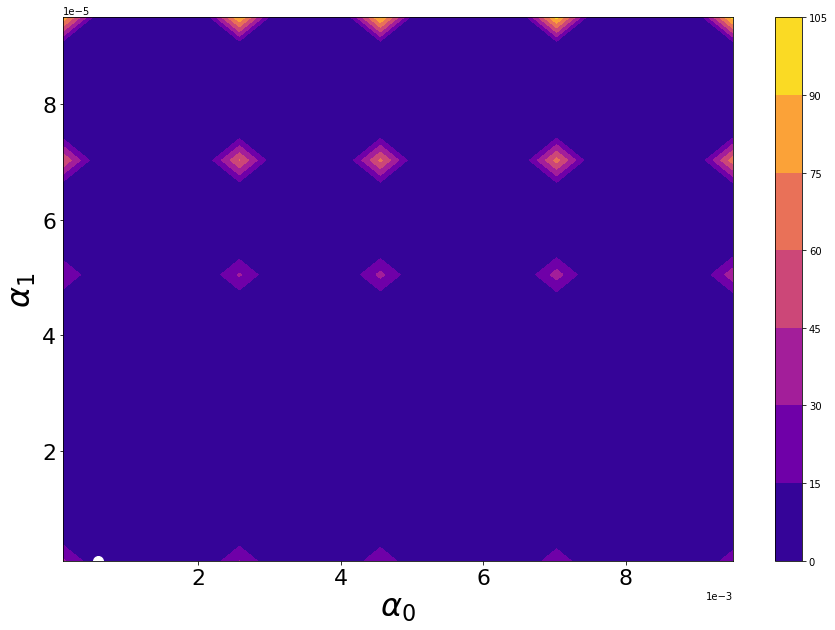

In [5]:
fig = plt.figure(figsize=(15, 10))

# Define the x, y, and z values
x = df_CDB['parameter1_values']
y = df_CDB['parameter2_values']
z = df_CDB['RMSE_Energy']

# Create a 2D histogram for all three variables
hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[x.min(), x.max()], [y.min(), y.max()]])
z_hist, _, _ = np.histogram2d(x, y, bins=20, range=[[x.min(), x.max()], [y.min(), y.max()]], weights=z)

# Calculate the mean RMSE_Energy for each bin
mean_z = np.divide(z_hist, hist, where=hist>0)

# Create a filled contour plot
plt.contourf(xedges[:-1], yedges[:-1], mean_z, cmap='plasma')


# Add a colorbar
plt.colorbar()

# Add a scatter plot of the minimum point
min_idx = np.unravel_index(np.argmin(mean_z), mean_z.shape)
plt.scatter(xedges[min_idx[1]], yedges[min_idx[0]], color='white', marker='o', s=100)

# Set the axis labels and title
plt.xlabel('Parameter 1 Values')
plt.ylabel('Parameter 2 Values')
#plt.title('RMSE Energy Contour Plot')

#lable
plt.xlabel(r'$\alpha_0$', fontsize=32)
plt.ylabel(r'$\alpha_1$', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set the number format of the x and y ticks to scientific notation
#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_powerlimits((-3, 3))
#plt.gca().yaxis.set_major_formatter(formatter)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
#plt.gcf().axes[0].yaxis.get_offset_text().set_fontsize(14)
plt.rc('font', size=22)

#Save
plt.savefig(r'../../figures/calibration-CDB-counter-oct2021-sep2022.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()


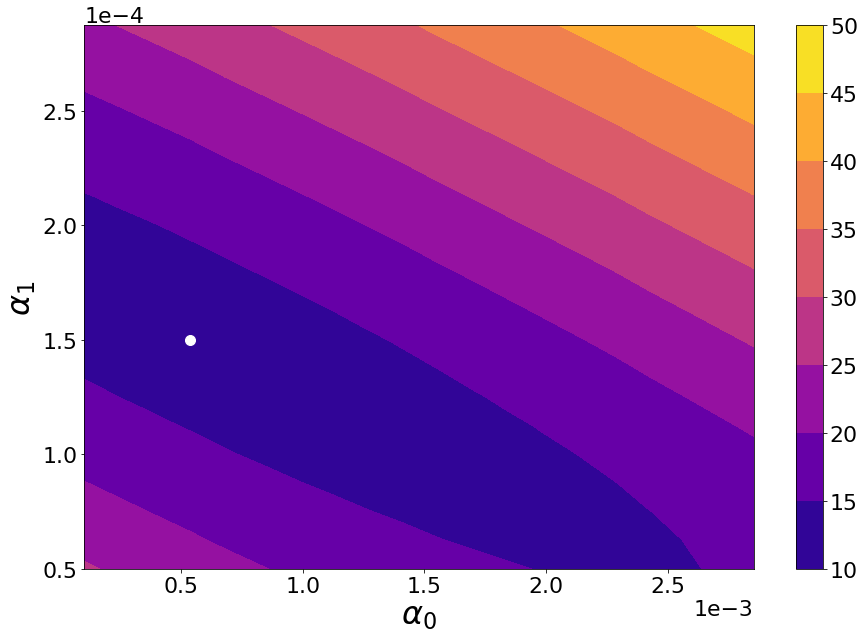

In [6]:
fig = plt.figure(figsize=(15, 10))

# Define the x, y, and z values
x = df_HEB['parameter1_values']
y = df_HEB['parameter2_values']
z = df_HEB['RMSE_Energy']

# Create a 2D histogram for all three variables
hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[x.min(), x.max()], [y.min(), y.max()]])
z_hist, _, _ = np.histogram2d(x, y, bins=20, range=[[x.min(), x.max()], [y.min(), y.max()]], weights=z)

# Calculate the mean RMSE_Energy for each bin
mean_z = np.divide(z_hist, hist, where=hist>0)

# Create a filled contour plot
plt.contourf(xedges[:-1], yedges[:-1], mean_z, cmap='plasma')

# Get the index of the minimum value in mean_z
min_idx = np.unravel_index(np.argmin(mean_z), mean_z.shape)


# Add a colorbar
plt.colorbar()


# Plot a dot at the minimum point on the contour plot
#plt.plot(xedges[min_idx[0]], yedges[min_idx[1]], 'ro')
plt.scatter(xedges[min_idx[1]], yedges[min_idx[0]], color='white', marker='o', s=100)

# Set the axis labels and title
plt.xlabel('Parameter 1 Values')
plt.ylabel('Parameter 2 Values')
#plt.title('RMSE Energy Contour Plot')

#lable
plt.xlabel(r'$\alpha_0$', fontsize=32)
plt.ylabel(r'$\alpha_1$', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set the number format of the x and y ticks to scientific notation
#formatter = ticker.ScalarFormatter(useMathText=True)
#formatter.set_powerlimits((-3, 3))
#plt.gca().yaxis.set_major_formatter(formatter)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
#plt.gcf().axes[0].yaxis.get_offset_text().set_fontsize(18)
plt.rc('font', size=22)


#Save
plt.savefig(r'../../figures/calibration-HEB-counter-oct2021-sep2022.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()
